The steps to be taken are,

- Carrying out Exploratory Data Analysis
- Performing Data Pre-Processing
- Performing Machine Learning Modeling
- Determining the Best Model

**Import the required libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

**Import Dataset**

In [3]:
# import dataset
url = 'https://raw.githubusercontent.com/dimsdika12/DataAnalystProject_Python/main/Telco_Customer%20Churn%20Prediction/dasaset/telco_clean.csv'
df_load = pd.read_csv(url)

# Display the shape of the dataset
print(df_load.shape)

# Display the top 5 data
print(df_load.head())

# Display the number of unique IDs
print(df_load.customerID.nunique())

(6950, 13)
   UpdatedAt   customerID  gender SeniorCitizen Partner  tenure PhoneService  \
0     202006  45759018157  Female            No     Yes       1           No   
1     202006  45315483266    Male            No     Yes      60          Yes   
2     202006  45236961615    Male            No      No       5          Yes   
3     202006  45929827382  Female            No     Yes      72          Yes   
4     202006  45305082233  Female            No     Yes      56          Yes   

  StreamingTV InternetService PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No             Yes              Yes           29.85         29.85   
1          No              No              Yes           20.50       1198.80   
2         Yes             Yes               No          104.10        541.90   
3         Yes             Yes              Yes          115.50       8312.75   
4         Yes             Yes               No           81.25       4620.40   

  Churn  
0    No  
1    No

# Exploratory Data Analysis

looking presentage of churn customer

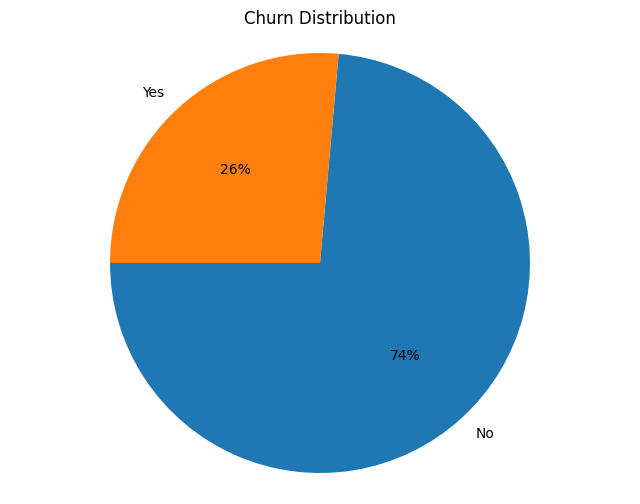

In [4]:
# Count the unique values in the 'Churn' column
churn_counts = df_load['Churn'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%.0f%%', startangle=180)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show()

display the data types of each column in the DataFrame.

In [5]:
df_load.dtypes

UpdatedAt             int64
customerID            int64
gender               object
SeniorCitizen        object
Partner              object
tenure                int64
PhoneService         object
StreamingTV          object
InternetService      object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

 Next, we'll select numeric predictor variables and create bivariate plots,
then proceed to interpret the relationships between them. In this case columns ["MonthlyCharges","TotalCharges","tenure"]


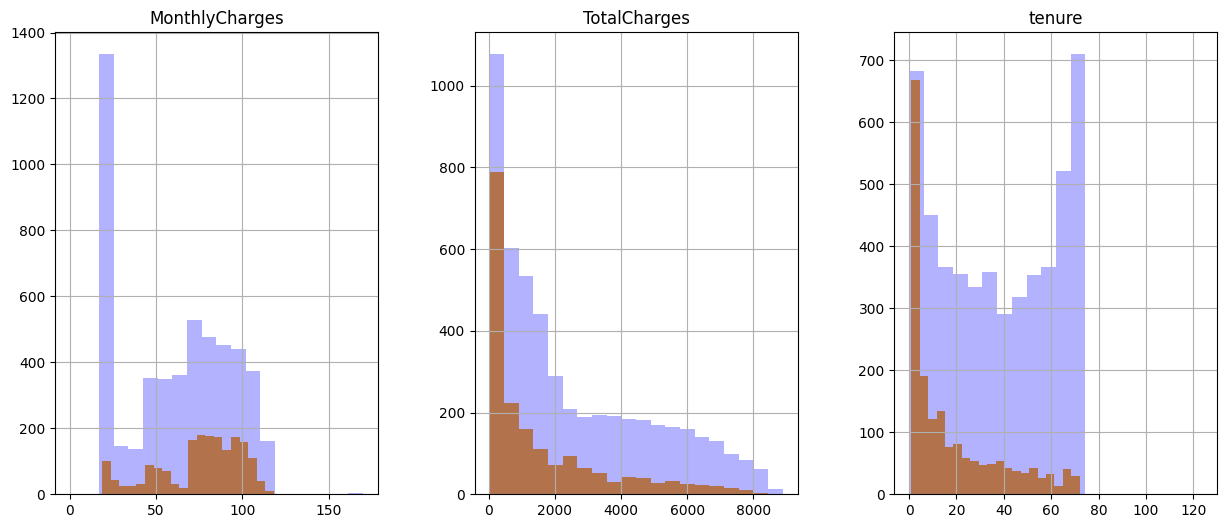

In [6]:
#creating bin in chart
numerical_features = ["MonthlyCharges","TotalCharges","tenure"]
fig, ax = plt.subplots(1,3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=1, ax=ax)
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.3, ax=ax)
plt.show()

Subsequently, we'll choose categorical predictor variables and create bivariate plots,followed by interpreting the relationships between them. In this case columns ['gender','partner','SeniorCitizen','PhoneService','StreamingTV','InternetService','PaperlessBilling']


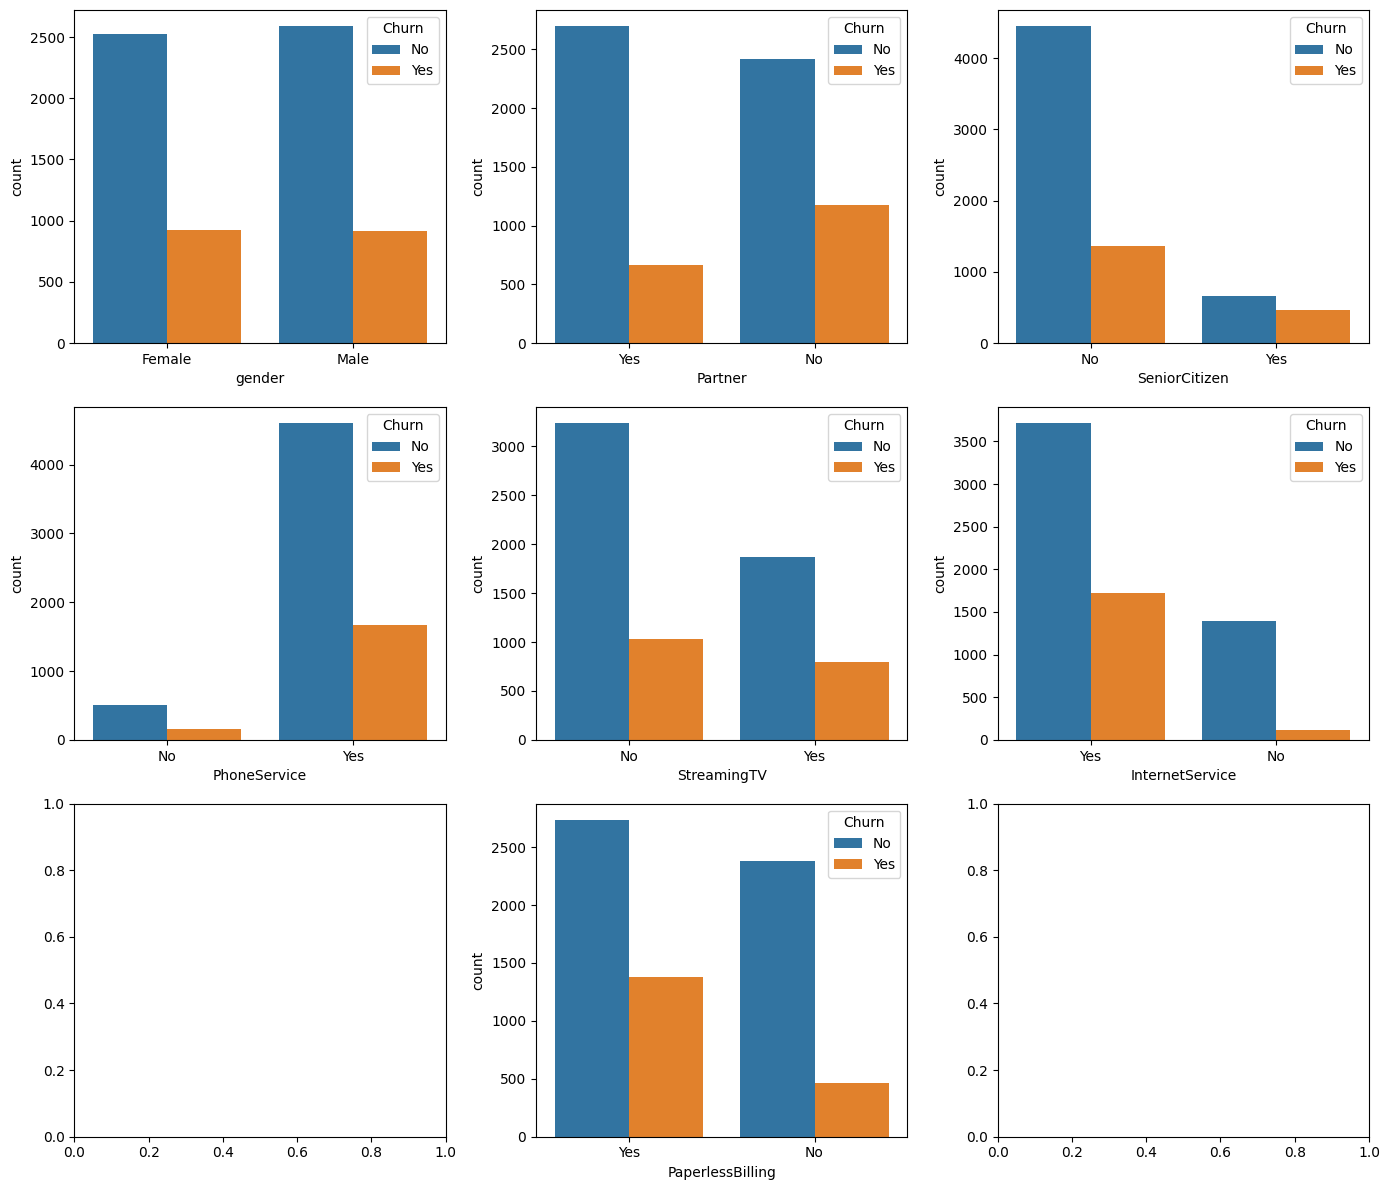

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load,x= 'gender', hue="Churn", ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue="Churn", ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue="Churn", ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue="Churn", ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue="Churn", ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue="Churn", ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue="Churn", ax=ax[2][1])
plt.tight_layout()
plt.show()

Conclusion:

1. The overall data distribution reveals that customers predominantly don't churn, with a breakdown of 26% for Churn and 74% for No Churn.

2.  Analyzing MonthlyCharges indicates a trend where lower monthly charges correspond to a lower likelihood of churn. However, for TotalCharges, there appears to be no discernible trend regarding churn. Additionally, there's a pattern suggesting that longer tenure decreases the likelihood of churn among customers.

3.  Gender and PhoneService do not show significant differences among churn behavior. However, several tendencies are observable: customers without partners (partner: No), senior citizens (SeniorCitizen: Yes), subscribers to StreamingTV (StreamingTV: Yes), users of Internet services (InternetService: Yes), and those opting for paperless billing (PaperlessBilling: Yes) are more prone to churn.


# Performing Data Pre-Processing

Remove the unnecessary columns

In [8]:
#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


Using LabelEncoder to Encode Categorical Data

In [9]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
	if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
	cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

Splitting Dataset

In [10]:
# Predictor dan target
X = cleaned_df.drop('Churn',axis=1)
y = cleaned_df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape, ', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape, ', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


# Modelling: Logistic Regression

In [11]:
# training model Logistic Regression
log_model = LogisticRegression().fit(x_train, y_train)

Performance Data Training

In [12]:
# Predict data training
y_train_pred = log_model.predict(x_train)
# Print classification report
print("Classification Report Training Model (Logistic Regression) :")
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.79      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.79      0.79      4865



Confussion matrix for Training Model (Logistic Regression)

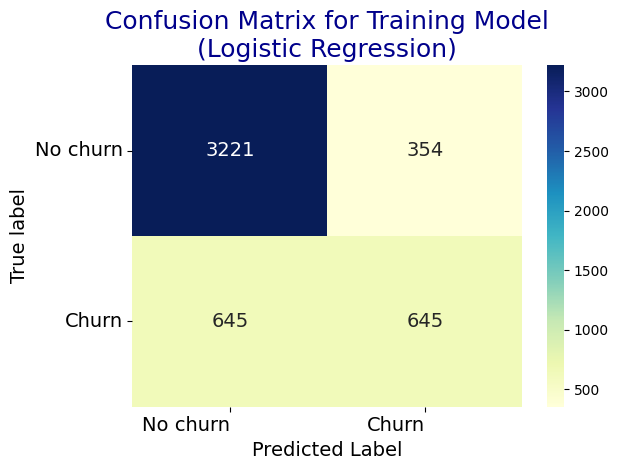

In [13]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.tight_layout()
plt.show()


Performance Data Testing

In [14]:
# Predict data testing
y_test_pred = log_model.predict(x_test)
# Print classification report
print("Classification Report Testing Model (Logistic Regression) :")
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.49      0.56       546

    accuracy                           0.79      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.78      0.79      0.79      2085



Confussion matrix for Testing Model (Logistic Regression)

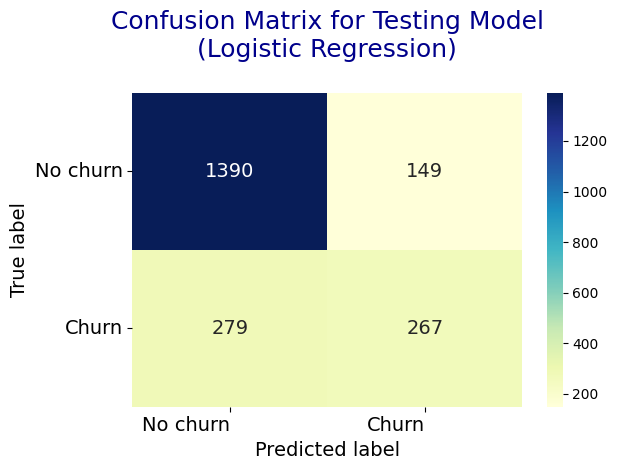

In [15]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

When using the Logistic Regression algorithm from `sklearn` without any additional parameters, it produces the default model from sklearn, as detailed in its documentation.

From the training data, the model shows an accuracy of 79%. Prediction details include:
- Correctly predicted churn: 645
- Correctly predicted non-churn: 3221
- Predicted non-churn that is actually churn: 645
- Predicted churn that is actually non-churn: 354

From the testing data, the model exhibits an accuracy of 79%. Prediction details are:
- Correctly predicted churn: 267
- Correctly predicted non-churn: 1390
- Predicted non-churn that is actually churn: 279
- Predicted churn that is actually non-churn: 149


# Modelling : Random Forest Classifier

In [16]:
# training model RandomForestClassifier
rdf_model = RandomForestClassifier().fit(x_train, y_train)

Performance Data Training

In [17]:
# predict data training
y_train_pred = rdf_model.predict(x_train)
print("Classification Report Training Model (Random Forest Classifier)")
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest Classifier)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



Confussion matrix for Training Model (Random Forest)

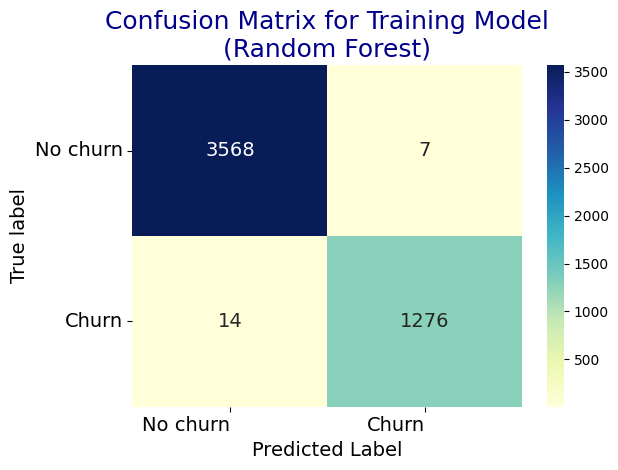

In [18]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title("Confusion Matrix for Training Model\n(Random Forest)", fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.tight_layout()
plt.show()

Performance Data Testing

In [19]:
# Predict data testing
y_test_pred = rdf_model.predict(x_test)
# Print classification report
print("Classification Report Testing Model (Random Forest Classifier)")
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier)
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1539
           1       0.60      0.47      0.53       546

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.77      0.78      0.77      2085



Confusion Matrix for Testing Model (Random Forest)

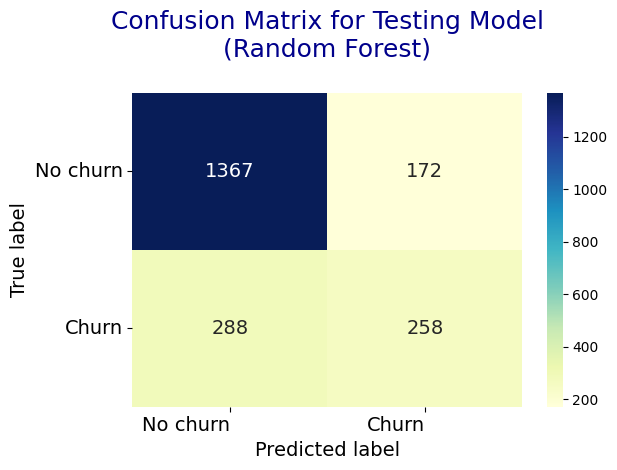

In [20]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel("True label", fontsize=14)
plt.xlabel("Predicted label",fontsize=14)
plt.tight_layout()
plt.show()

From the results and analysis above:

- When using the Random Forest algorithm by calling `RandomForestClassifier()` from sklearn without adding any parameters, it produces the default model from sklearn, as detailed in its documentation.

- From the training data, the model appears capable of predicting data with an accuracy of 100%. Detailed predictions:
    - Correctly predicted churn: 1276
    - Correctly predicted non-churn: 3568
    - Predicted non-churn that is actually churn: 14
    - Predicted churn that is actually non-churn: 7

- From the testing data, the model seems to predict data with an accuracy of 78%. Detailed predictions include:
    - Correctly predicted churn: 258
    - Correctly predicted non-churn: 1367
    - Predicted non-churn that is actually churn: 288
    - Predicted churn that is actually non-churn: 172


# Modelling: Gradient Boosting Classifier

In [21]:
# training model Gradient Boosting Classifier
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)

performance data training

In [22]:
# Predict data training
y_train_pred = gbt_model.predict(x_train)
# Print classification report
print("Classification Report Training Model (Gradient Boosting) :")
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Gradient Boosting) :
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



Confusion Matrix for Training Model (Gradient Boosting)

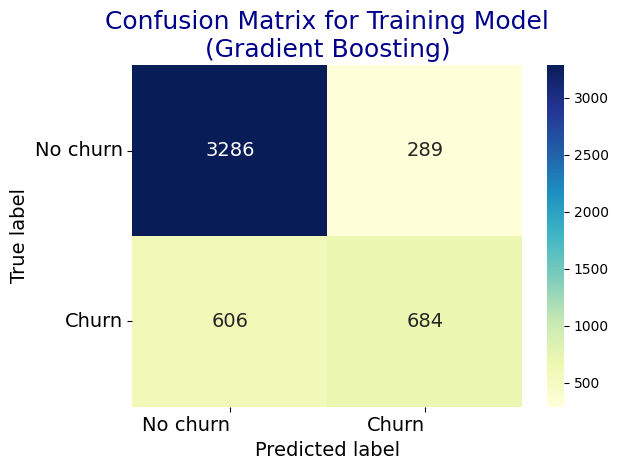

In [23]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title("Confusion Matrix for Training Model\n(Gradient Boosting)", fontsize=18, color='darkblue')
plt.ylabel("True label", fontsize=14)
plt.xlabel("Predicted label", fontsize=14)
plt.tight_layout()
plt.show()

performance data testing

In [24]:
# Predict data testing
y_test_pred = gbt_model.predict(x_test)
# Print classification report
print("Classification Report Testing Model (Gradient Boosting):")
print(classification_report(y_test,y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



confusion matrix for testing model (Gardient Boosting)

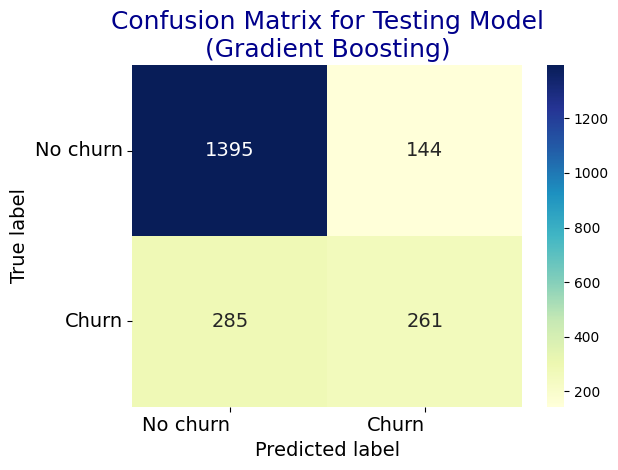

In [25]:
#Form confusion matrix as a DataFrame
confusion_matrix_df =  pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title("Confusion Matrix for Testing Model\n(Gradient Boosting)", fontsize=18, color='darkblue')
plt.ylabel("True label", fontsize=14)
plt.xlabel("Predicted label",fontsize=14)
plt.tight_layout()
plt.show()


From the results and analysis above:

- When using the Gradient Boosting algorithm by calling `GradientBoostingClassifier()` from the sklearn package without adding any parameters, it produces the default model from sklearn, as detailed in its documentation.

- From the training data, the model appears to predict data with an accuracy of 82%. Detailed predictions:
    - Correctly predicted churn: 684
    - Correctly predicted non-churn: 3286
    - Predicted non-churn that is actually churn: 606
    - Predicted churn that is actually non-churn: 289

- From the testing data, the model seems to predict data with an accuracy of 79%. Detailed predictions include:
    - Correctly predicted churn: 261
    - Correctly predicted non-churn: 1395
    - Predicted non-churn that is actually churn: 285
    - Predicted churn that is actually non-churn: 144


# Conclusion

Based on the modeling conducted using Logistic Regression, Random Forest, and Extreme Gradient Boost algorithms, it can be concluded that the best model for predicting customer churn in this telco dataset is the Logistic Regression algorithm. This is because the performance of the Logistic Regression model tends to predict equally well in both the training and testing phases (training accuracy 79%, testing accuracy 79%). On the other hand, the performance of other algorithms tends to overfit.

However, this does not imply that Logistic Regression should always be used for modeling. It's still crucial to experiment with various models to determine the most effective one, as the best choice may vary depending on the dataset and problem at hand.
